# SVM Iris dataset example

In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import project_path
from ciu import determine_ciu


In [61]:
iris = pd.read_csv(os.path.join('data','IRIS.csv'))

In [62]:
# Checking the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [65]:
from sklearn.svm import SVC
model=SVC(kernel='linear', probability=True)


In [66]:
model.fit(x_train, y_train)
model.coef_

array([[-0.23917402,  0.4822724 , -0.86506466, -0.6029234 ],
       [-0.14506995,  0.13260586, -0.47658459, -0.22792277],
       [ 0.5907346 ,  0.44853278, -2.07179389, -2.07539523]])

In [67]:

pred=model.predict(x_test)


In [68]:
feature_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
]


case = x_test.values[0]
example_prediction = model.predict([x_test.values[0]])
example_prediction_probs = model.predict_proba([x_test.values[0]])
prediction_index = list(example_prediction_probs[0]).index(max(example_prediction_probs[0]))

print(feature_names)
print(f'Case: {case}; Prediction {example_prediction}; Probability: {example_prediction_probs}')
print(prediction_index)
list(example_prediction_probs[0])

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Case: [6.5 3.  5.8 2.2]; Prediction ['Iris-virginica']; Probability: [[0.00755293 0.00226323 0.99018384]]
2


[0.0075529265837307995, 0.002263233254892957, 0.9901838401613764]

In [69]:

ciu = determine_ciu(
    x_test.iloc[0, :].to_dict(),
    model.predict_proba,
    {
        'sepal_length': [4.3, 7.9, False],
        'sepal_width': [2, 4.4, False],
        'petal_length': [1, 6.9, False],
        'petal_width': [0.1, 2.5, False],
    },
    10000,
    prediction_index,
)


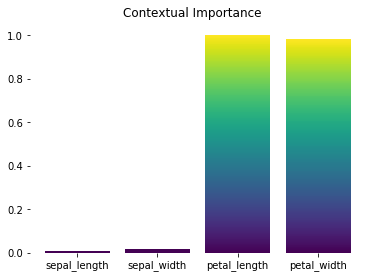

In [70]:
ciu.plot_ci()

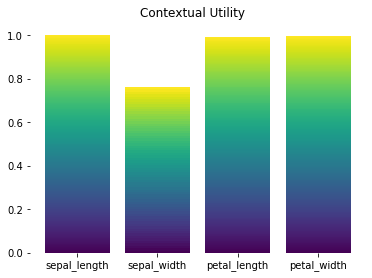

In [71]:
ciu.plot_cu()

In [72]:
print(ciu.text_explain())

['The feature "sepal_length", which is not important (CI=0.91%), is very typical for its class (CU=99.98%).', 'The feature "sepal_width", which is not important (CI=1.58%), is very typical for its class (CU=76.32%).', 'The feature "petal_length", which is highly important (CI=100.0%), is very typical for its class (CU=99.2%).', 'The feature "petal_width", which is highly important (CI=98.15%), is very typical for its class (CU=99.7%).']
